<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_AnalisisdeDatosEnPython/blob/main/Laboratorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 4 (Trabajo final, parte uno)

Bienvenido al tercer laboratorio del curso Análisis de Datos en Python.

Escribe el código correspondiente para contestar cada una de las preguntas. Fíjate muy bien en el nombre de las variables, ya que de lo contrario, tu trabajo no podrá ser evaluado de manera correcta.

Debes ir ejecutando las celdas de codigo en el orden que aparecen, para evitar tener errores.

El laboratorio consta de dos partes: la primera, que realizarás en este jupyter notebook y la segunda, que se encuentra en el recurso llamado "Trabajo final (parte 2)"

In [116]:
## Primero importamos las librerias y los datos que utilizaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones data')
ratings = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones ratings')
users = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones users')

### Pregunta 1

Utilice el método de agrupación “K-Means” y construya 3 agrupaciones de celulares, considerando los siguientes atributos

`['internal memory','RAM','performance','main camera','selfie camera','battery size']`

¿Qué puede decir sobre los precios de venta de los celulares de cada grupo?

Para responder a lo anterior, construye un dataframe que contega los 3 clusters y para cada grupo obtenga el precio promedio, la desviación estandar del precio, precio mínimo y precio máximo.

**MUY IMPORTANTE**
* NO debes aproximar ni redondear ningún valor
* Utilizar la función `preprocessing.MinMaxScaler()` para estandarizar datos.
* Usa la función `KMeans` con `random_state=42`. Los datos que entregas a esta función deben estar estandarizados, según el punto anterior.

Debes crear una tabla de la forma:


|   | Grupo k means | Precio promedio | Desv est precio | Precio mínimo | Precio máximo |
|---|---|---|---|---|---|
|0 | 0  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |
|1 | 1  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |
|2 | 2  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |

Utiliza los mismos nombres para los Headers: Grupo k means, Precio promedio, Desv est precio, Precio mínimo, Precio máximo. Es importante que respetes las mayúsculas de dichos nombres tal cual son señalados.
Debe guardarse en la variable 'data_grupos'

In [117]:
data_grupos=None

columnas = ['internal memory','RAM','performance','main camera','selfie camera','battery size']
# your code here
#raise NotImplementedError

#Incorporamos la información de la pestaña data a nuestro array de columnas
inc_data = data[columnas]

#Aplicamos Scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(inc_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['cluster'] = clusters

# Calcular el set de estadísticas
price_stats = data.groupby('cluster')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Renombramos las columnas
price_stats = price_stats.rename(columns={
    'cluster': 'Grupo k means',
    'mean': 'Precio promedio',
    'std': 'Desv est precio',
    'min': 'Precio mínimo',
    'max': 'Precio máximo'
})

data_grupos = price_stats
print(data_grupos)

   Grupo k means  Precio promedio  Desv est precio  Precio mínimo  \
0              0       225.375000       122.057290            129   
1              1       642.571429       212.874725            312   
2              2       903.090909       565.528683            236   

   Precio máximo  
0            500  
1            987  
2           1998  


Haremos un test visible para ver si estamos por buen camino, usaremos de ejemplo el primer grupo (Grupo 0). Tu tabla debe comenzar de la siguiente forma:

|   | Grupo k means | Precio promedio | Desv est precio | Precio mínimo | Precio máximo |
|---|---|---|---|---|---|
|0 | 0  | 225.375000 |  122.057290  |  129  |  500  |


In [118]:
# Revisión del primer cluster

data_cluster_0 = data_grupos[data_grupos["Grupo k means"] == 0]

assert np.round(data_cluster_0["Precio promedio"].values,1) == 225.4, "Promedio del cluster 0 con errores"
assert np.round(data_cluster_0["Desv est precio"].values, 1) == 122.1, "Desviación estandar del cluster 0 con errores"

assert np.round(data_cluster_0["Precio mínimo"].values, 1) == 129.0, "Mínimo del cluster 0 con errores"
assert np.round(data_cluster_0["Precio máximo"].values, 1) == 500, "Máximo del cluster 0 con errores"


Ahora haremos el test real, no debes modificar ni escribir nada en la siguiente celda, solo debes ejecutarla.

### Pregunta 2
Calcule la correlación (bivariada) entre el precio y todas las variables cuantitativas con información sobre los celulares. ¿Cuáles son las 3 variables que presentan una mayor correlación con el precio?
Para responder a la pregunta, debes completar las variables variable_1, variable_2 y variable_3 con las 3 variables que poseen mayor correlacion, siendo variable_1 la que mayor correlación posee, variable_2, la segunda mayor y variable_3 la tercera mayor.

Ejemplo: si la variable 'main camera' fuera la variable con mayor correlación. Entonces deben dejar
variable_1 = 'main camera', si la segunda mayor fuera 'RAM' entonces variable_2 = 'RAM' (deben respetar el nombre con sus espacios y mayúsculas)

NOTA: Deben generar las correlaciones de la forma que más cómodos se sientan, no tendrán puntaje aquellos que completan las variables sin entregar un respaldo con las correlaciones calculadas.

In [119]:
variable_1=None
variable_2=None
variable_3=None

# your code here
#raise NotImplementedError

# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=[float, int])

# Calcular la correlación (bivariada) entre el precio y todas las variables cuantitativas
correlations = numerical_data.corr()['price'].sort_values(ascending=False)

# Seleccionar las tres variables con mayor correlación con el precio
top_correlations = correlations.index[1:4]  # Excluir 'price' mismo

variable_1 = top_correlations[0]
variable_2 = top_correlations[1]
variable_3 = top_correlations[2]

# Mostrar las correlaciones calculadas
print("Correlaciones:\n", correlations)
print("\nVariables con mayor correlación:")
print("Variable 1:", variable_1)
print("Variable 2:", variable_2)
print("Variable 3:", variable_3)


Correlaciones:
 price              1.000000
internal memory    0.834266
RAM                0.706235
cluster            0.588084
weight             0.546797
performance        0.527611
screen size        0.316986
selfie camera      0.023828
cellphone_id      -0.084871
battery size      -0.134425
main camera       -0.255498
Name: price, dtype: float64

Variables con mayor correlación:
Variable 1: internal memory
Variable 2: RAM
Variable 3: cluster


Revisemos que los nombres de las variables hayan sido bien escritos,

In [120]:
for v in [variable_1, variable_2, variable_3]:
    print(v in data.columns)

True
True
True


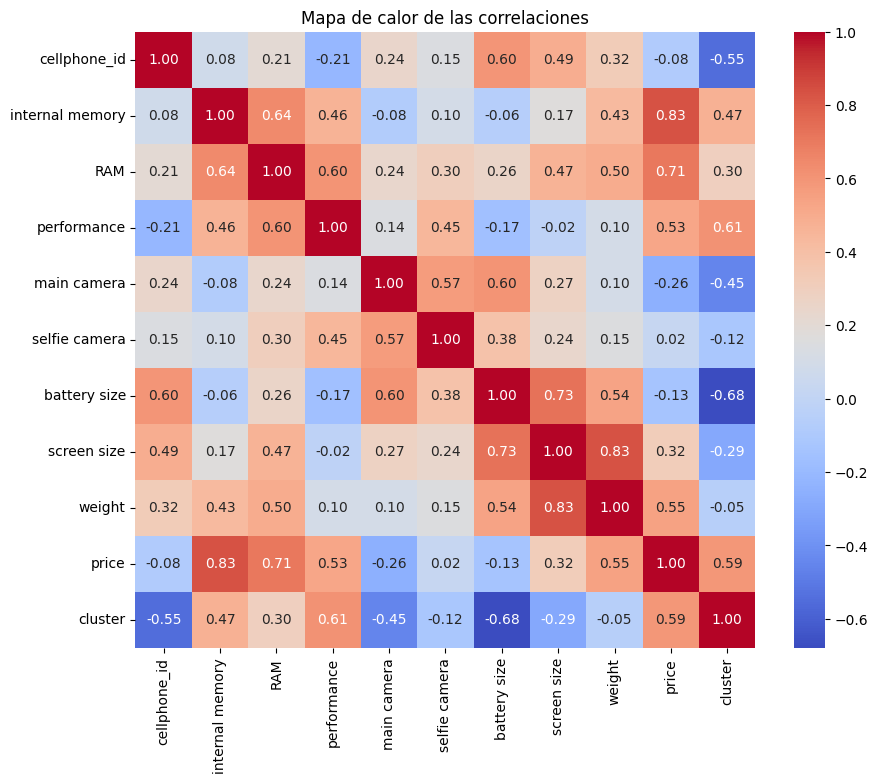

In [133]:
# Generar un mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de las correlaciones')
plt.show()


### Pregunta 3
Construya una regresión multivariada entre precio y las 3 variables determinadas en la parte (2). Utilice un 20% de los datos para testear y un random_state de 42. El entorno de este jupyter notebook permite el LinearRegression(normalize=True), así que úsenlo.
Una vez construido su modelo, debe almacenar la siguiente información:

    'coeficientes': para esto utilicen el comando .coef_ (nombredesumodelo.coef_) y lo almacenan directamente en la variable sin redondear ni aproximar nada.
    'intercepto': para esto utilicen el comando .intercept_ (nombredesumodelo.intercept_) y lo almacenan directamente en la variable sin redondear ni aproximar nada.
    'r2_score_final': también sin redondear ni aproximar nada.
    
Adicionalmente, genera una gráfica que contraste los valores reales con la predicción.


Las tres variables con mayor correlación son: internal memory, RAM, cluster
Coeficientes: [207.89102315 167.3947098  120.46590021]
Intercepto: 688.3846153846154
R2 Score: 0.0859245798322047


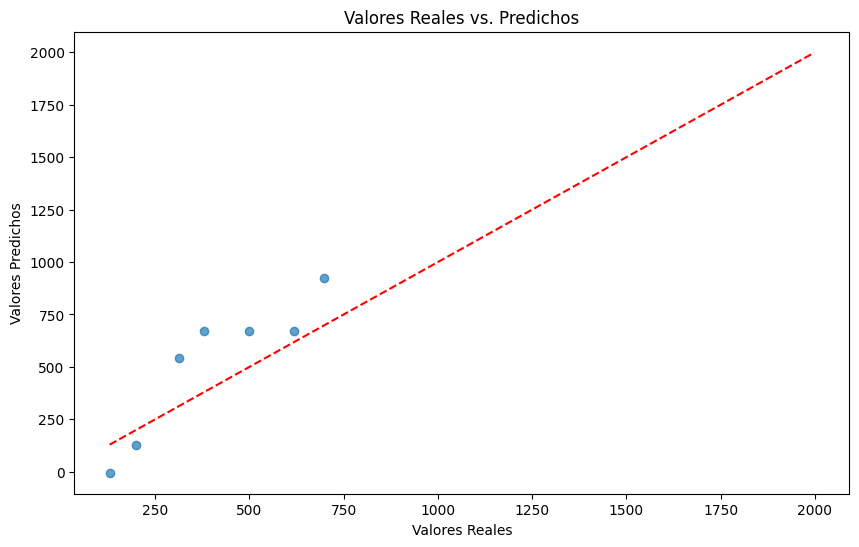

(array([207.89102315, 167.3947098 , 120.46590021]),
 688.3846153846154,
 0.0859245798322047)

In [132]:


# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[float, int])

# Calcular la correlación (bivariada) entre el precio y todas las variables cuantitativas
correlations = numeric_data.corr()['price'].sort_values(ascending=False)

# Seleccionar las tres variables con mayor correlación con el precio
top_correlations = correlations.index[1:4]  # Excluir 'price' mismo
variable_1 = top_correlations[0]
variable_2 = top_correlations[1]
variable_3 = top_correlations[2]

# Mostrar las variables seleccionadas
print(f"Las tres variables con mayor correlación son: {variable_1}, {variable_2}, {variable_3}")

# Seleccionar las variables independientes y la variable dependiente
X = data[[variable_1, variable_2, variable_3]]
y = data['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener los coeficientes, intercepto y r2_score
coeficientes = model.coef_
intercepto = model.intercept_
y_pred = model.predict(X_test)
r2_score_final = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("R2 Score:", r2_score_final)

# Generar la gráfica que contraste los valores reales con la predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

# Almacenar los resultados en variables
coeficientes, intercepto, r2_score_final


In [51]:
Coeficientes: [207.89102315 167.3947098  120.46590021]
Intercepto: 688.3846153846154
R2 Score: 0.0859245798322047


### Pregunta 4
Construya una agrupación, utilizando K-Means, considerando ranking promedio (puesto por el comprador), edad y sexo. Escoja, con el método del codo, la cantidad de grupos. ¿Qué puede decir de las similitudes o diferencias intra e inter grupos?
Utilice el min_max_scaler para la estandarización de los datos y utilice un random_state de 42 en la creación de Kmeans.
Hint: para el método del códogo, haga un range hasta 15.

Para responder esta pregunta, complete la variable 'clusters' con el número de clusters que obtenga mediante el método del codo, si su resultado es 10, entonces 'clusters'=10. (como int).
Elija el segundo codo, el primero será muy notorio y evitende, pero el segundo será la opción correcta.

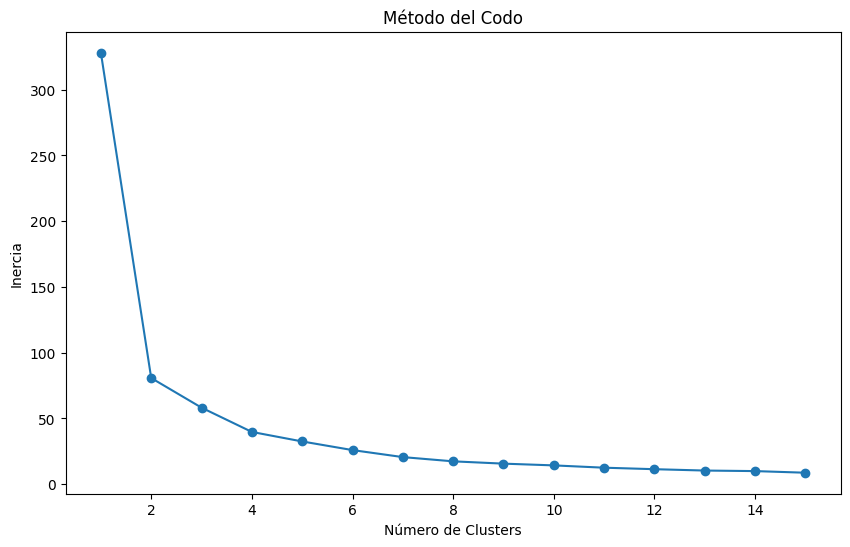

clusters = 4
            user_id  cellphone_id    rating        age
cluster                                               
0        150.475806     16.561828  6.873656  30.803763
1        118.878788     16.457576  6.672727  31.636364
2        118.000000     16.300000  6.778571  50.785714
3        157.317568     16.101351  6.250000  47.439189


In [104]:
#En esta primera parte, calcule los clusters mediante el método del codo.
clusters=None

# your code here
#raise NotImplementedError
# Unir las tablas para obtener la información necesaria
data_merged = ratings.merge(users, on='user_id')

# Seleccionar los atributos a utilizar para la agrupación
columns = ['rating', 'age', 'gender']
data_attributes = data_merged[columns]

# Convertir la columna 'gender' a valores numéricos
data_attributes['gender'] = data_attributes['gender'].map({'Male': 0, 'Female': 1})

# Asegurarse de que todos los datos sean numéricos
data_attributes = data_attributes.apply(pd.to_numeric, errors='coerce')

# Estandarizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
df_escalado_p4 = scaler.fit_transform(data_attributes)

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for n in range(1, 16):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_escalado_p4)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Basado en la gráfica, determinar el número de clusters según el segundo codo visible
# Ajusta el valor de 'clusters' al segundo codo visible
clusters = 4  # Cambia este valor según lo que observes en la gráfica

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=clusters, random_state=42)
data_merged['cluster'] = kmeans.fit_predict(df_escalado_p4)

# Mostrar los resultados de los clusters
cluster_summary = data_merged.groupby('cluster').mean(numeric_only=True)

# Asignar el número de clusters a la variable 'clusters'
clusters = 4  # Actualiza este valor según el segundo codo visible en la gráfica

# Imprimir el número de clusters y el resumen de los clusters
print(f"clusters = {clusters}")
print(cluster_summary)

In [105]:
# Revisemos que la variable haya quedado correctamente asignada a tu respuesta,
print(clusters)

4


Ahora se procederá a evaluar los clusters obtenidos, no modifique ni altere la celda que está acontinuación, solo debe ejecutarla.

*Ahora* debe aplicar el método de kmeans con el número de clusters obtenido y graficarlos.
Ruerde utilizar la semilla de random_state=42

In [106]:
kmeans_p4 = KMeans(n_clusters=4, random_state=42).fit(df_escalado_p4)
centroids_p4 = kmeans_p4.cluster_centers_
centroids_p4

labels_p4 = kmeans_p4.predict(df_escalado_p4)
data_p4['label'] = labels_p4
data_p4['cellphone_id'] = id_cell

x = df_escalado_p4['rating'].values
y = df_escalado_p4['age'].values
z = df_escalado_p4['gender'].values

colores=['red','green','blue','orange']
asignar=[]
for row in labels_p4:
     asignar.append(colores[row])
plt.rcParams["figure.figsize"] = (12,7)
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=asignar)
ax.scatter3D(centroids_p4[:, 0], centroids_p4[:, 1],centroids_p4[:, 2], marker = '*',c=['red','green','blue','orange'],
            s=900)
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("Gender")
plt.title('Agrupación k-means puesto por el comprador')
plt.show()



NameError: name 'data_p4' is not defined